In [1]:
!pip install ace_tools

In [2]:
!pip install statsmodels


In [3]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 9.7 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [5]:
import pandas as pd
import pingouin as pg
#from docx import Document
from google.colab import drive

# Mount and load data
drive.mount('/content/drive')
# Load file
file_path = '/content/drive/MyDrive/Colab Notebooks/All Data/PANAS_positive_P001_P029.csv'
df_long = pd.read_csv(file_path)
df_long






Mounted at /content/drive


,Subject,Treatment,Positive Score
0,P001,Baseline,11
1,P001,Silver,14
2,P001,Placebo,17
3,P001,22K Gold,14
4,P002,Baseline,11
...,...,...,...
111,P028,Silver,12
112,P029,Baseline,14
113,P029,Placebo,13
114,P029,Silver,14


In [6]:
# Pivot the now-unique data
df_wide = df_long.pivot(index='Subject', columns='Treatment', values='Positive Score')
df_wide

Treatment,22K Gold,Baseline,Placebo,Silver
Subject,,,,
P001,14,11,17,14
P002,12,11,14,11
P003,11,11,11,11
P004,13,13,11,14
P005,18,17,15,16
P006,12,13,11,11
P007,12,12,12,13
P008,13,18,12,12
P009,12,12,19,14


In [7]:
# Define treatment order
treatments = ['Baseline', '22K Gold', 'Silver', 'Placebo']
df_wide = df_wide[treatments]
df_wide

Treatment,Baseline,22K Gold,Silver,Placebo
Subject,,,,
P001,11,14,14,17
P002,11,12,11,14
P003,11,11,11,11
P004,13,13,14,11
P005,17,18,16,15
P006,13,12,11,11
P007,12,12,13,12
P008,18,13,12,12
P009,12,12,14,19


In [8]:
# Compute pairwise differences
diffs = {}
pairs = [('Baseline', '22K Gold'), ('Baseline', 'Silver'), ('Baseline', 'Placebo'),
         ('22K Gold', 'Silver'), ('22K Gold', 'Placebo'), ('Silver', 'Placebo')]

for t1, t2 in pairs:
    col_name = f"{t1} - {t2}"
    diffs[col_name] = df_wide[t1] - df_wide[t2]

diff_df = pd.DataFrame(diffs)
diff_df

,Baseline - 22K Gold,Baseline - Silver,Baseline - Placebo,22K Gold - Silver,22K Gold - Placebo,Silver - Placebo
Subject,,,,,,
P001,-3,-3,-6,0,-3,-3
P002,-1,0,-3,1,-2,-3
P003,0,0,0,0,0,0
P004,0,-1,2,-1,2,3
P005,-1,1,2,2,3,1
P006,1,2,2,1,1,0
P007,0,-1,0,-1,0,1
P008,5,6,6,1,1,0
P009,0,-2,-7,-2,-7,-5


# Checking Assumptions

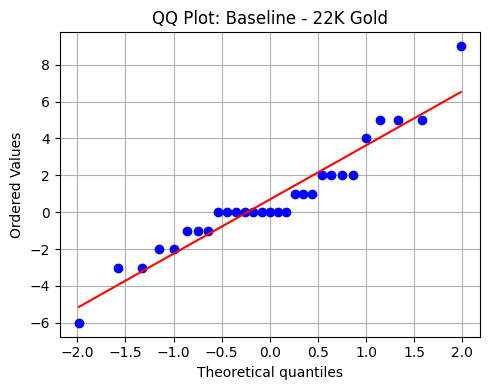

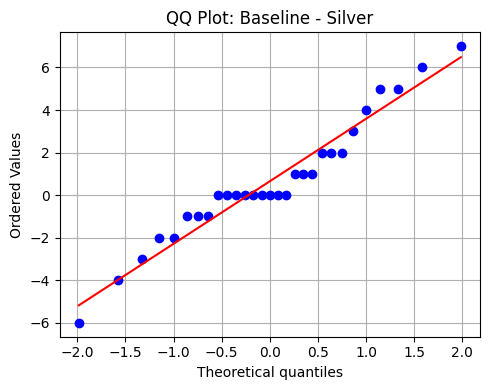

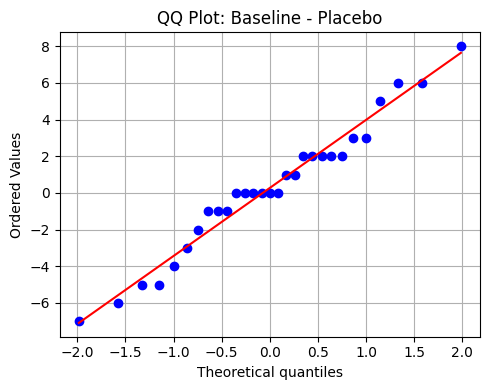

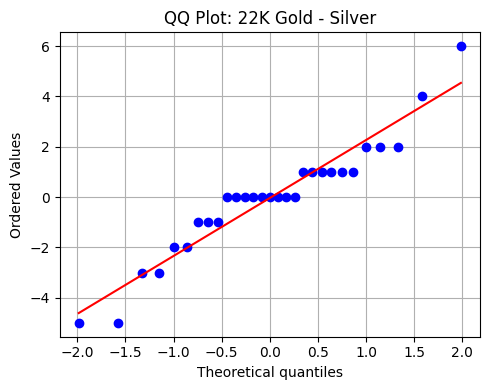

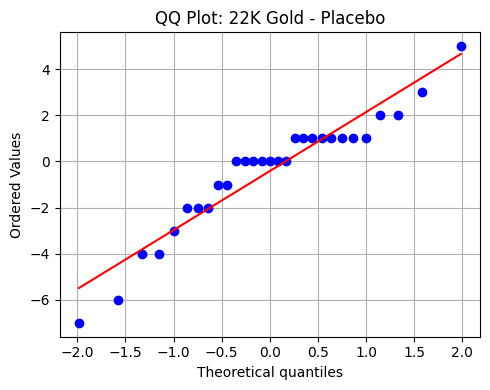

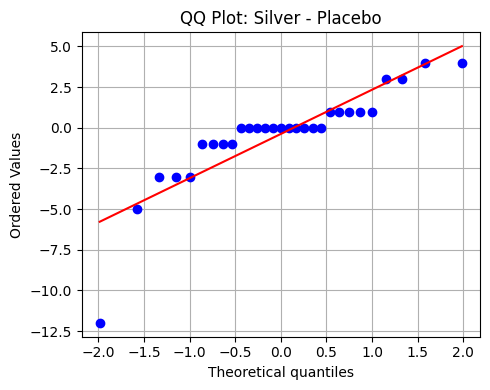

In [9]:
# Shapiro-Wilk test and QQ plots
shapiro_results = {}

for col in diff_df.columns:
    data = diff_df[col].dropna()
    stat, p = stats.shapiro(data)
    shapiro_results[col] = {'W': round(stat, 3), 'p-value': round(p, 3)}

    # QQ Plot
    plt.figure(figsize=(5, 4))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'QQ Plot: {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Shapiro-Wilk Rest Results

In [10]:
# Display summary of Shapiro results
pd.DataFrame(shapiro_results).T.rename(columns={'W': 'Shapiro-W', 'p-value': 'p-value'})

,Shapiro-W,p-value
Baseline - 22K Gold,0.937,0.082
Baseline - Silver,0.958,0.286
Baseline - Placebo,0.972,0.615
22K Gold - Silver,0.936,0.078
22K Gold - Placebo,0.926,0.043
Silver - Placebo,0.789,0.000


In [11]:
# Reshape the dataframe to long format for plotting
diff_long = diff_df.melt(var_name='Difference', value_name='Score')
diff_long


,Difference,Score
0,Baseline - 22K Gold,-3
1,Baseline - 22K Gold,-1
2,Baseline - 22K Gold,0
3,Baseline - 22K Gold,0
4,Baseline - 22K Gold,-1
...,...,...
169,Silver - Placebo,-12
170,Silver - Placebo,0
171,Silver - Placebo,1
172,Silver - Placebo,-1


## Outliers Check

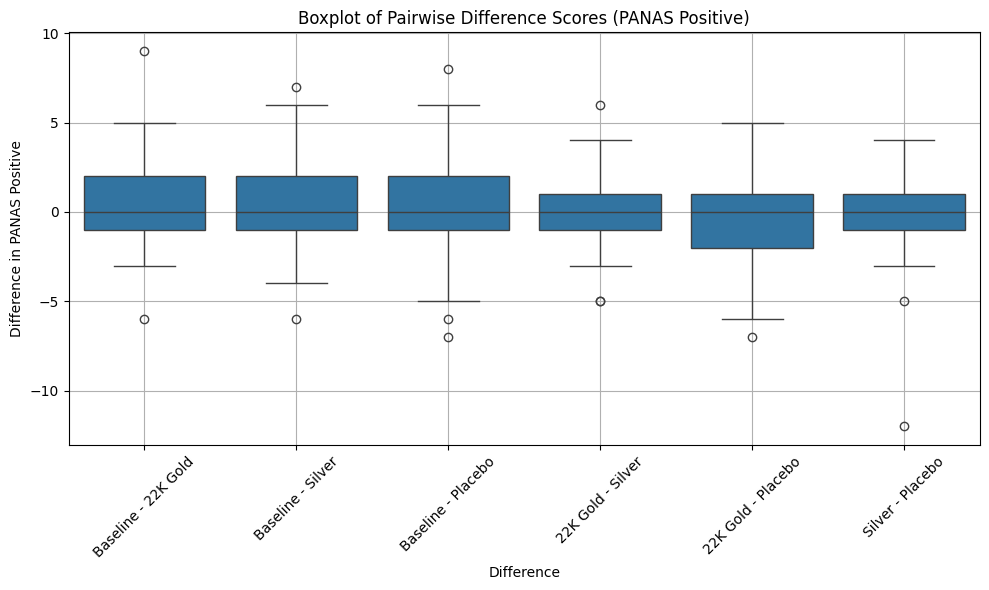

In [12]:
# Plot boxplots for each difference
plt.figure(figsize=(10, 6))
sns.boxplot(x='Difference', y='Score', data=diff_long)
plt.title('Boxplot of Pairwise Difference Scores (PANAS Positive)')
plt.xticks(rotation=45)
plt.ylabel('Difference in PANAS Positive')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
df_long

,Subject,Treatment,Positive Score
0,P001,Baseline,11
1,P001,Silver,14
2,P001,Placebo,17
3,P001,22K Gold,14
4,P002,Baseline,11
...,...,...,...
111,P028,Silver,12
112,P029,Baseline,14
113,P029,Placebo,13
114,P029,Silver,14


##  Mauchly’s Test Results

In [14]:
import pingouin as pg

# Run Mauchly’s Test of Sphericity directly on df_long
w_stat, p_value, chi2, dof, eps = pg.sphericity(data=df_long,
                                     dv='Positive Score',
                                     subject='Subject',
                                     within='Treatment')

# Display results
print(" Mauchly’s Test of Sphericity:")
print(f" - W-statistic            : {round(w_stat, 4)}")
print(f" - p-value                : {round(p_value, 4)}")
print(f" - Greenhouse-Geisser ε  : {round(eps, 4)}")
print(f" - Chi-square statistic   : {round(chi2, 4)}")
print(f" - Degrees of freedom     : {dof}")


# Interpretation
if p_value < 0.05:
    print(" Sphericity is violated. Use correction (e.g., Greenhouse-Geisser) or multivariate tests.")
else:
    print(" Sphericity assumption holds. We can proceed with standard RM-ANOVA.")

 Mauchly’s Test of Sphericity:
 - W-statistic            : 1
 - p-value                : 0.7698
 - Greenhouse-Geisser ε  : 0.2215
 - Chi-square statistic   : 6.992
 - Degrees of freedom     : 5
 Sphericity assumption holds. We can proceed with standard RM-ANOVA.


# RM ANOVA Results (Including Pillai's trace, Wilks' lambda, Hotelling-Lawley trace, and Roy's greatest root)

In [15]:
# Repeated Measures ANOVA & Pairwise for PANAS Positive
aov_sys = pg.rm_anova(dv='Positive Score', within='Treatment', subject='Subject', data=df_long, detailed=True)

print(aov_sys)

      Source          SS  DF        MS         F     p-unc       ng2       eps
0  Treatment    9.405172   3  3.135057  0.737981  0.532306  0.008176  0.850924
1      Error  356.844828  84  4.248153       NaN       NaN       NaN       NaN


In [16]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA


# Add Subject column (statsmodels requires it in the formula data)
df_wide['Subject'] = df_wide.index.astype(str)

# Run MANOVA using statsmodels (Multivariate RM-ANOVA)
# Formula: each treatment score is treated as a separate dependent variable
maov = MANOVA.from_formula('Baseline + Q("22K Gold") + Silver + Placebo ~ 1', data=df_wide)

# Print multivariate tests (robust to sphericity and outliers)
print(" Multivariate RM-ANOVA Results (Robust Version):\n")
print(maov.mv_test())

 Multivariate RM-ANOVA Results (Robust Version):

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0259 4.0000 25.0000 235.0642 0.0000
         Pillai's trace  0.9741 4.0000 25.0000 235.0642 0.0000
 Hotelling-Lawley trace 37.6103 4.0000 25.0000 235.0642 0.0000
    Roy's greatest root 37.6103 4.0000 25.0000 235.0642 0.0000



/tmp/ipython-input-16-3314258056.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wide['Subject'] = df_wide.index.astype(str)


In [17]:
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.power import FTestPower

# Extract the test table
mv_test = maov.mv_test()
stats_table = mv_test.results['Intercept']['stat']

# Prepare effect size and power calculator
power_calc = FTestPower()
alpha = 0.05
df1 = int(stats_table.loc["Pillai's trace", 'Num DF'])
df2 = int(stats_table.loc["Pillai's trace", 'Den DF'])

# Define test keys and formulas for partial η² approximation
summary_rows = []
for test_name in ["Pillai's trace", "Wilks' lambda", "Hotelling-Lawley trace", "Roy's greatest root"]:
    value = stats_table.loc[test_name, 'Value']
    f_val = stats_table.loc[test_name, 'F Value']

    # Approximate partial eta squared based on the test
    if test_name == "Pillai's trace":
        eta2 = value
    elif test_name == "Wilks' lambda":
        eta2 = 1 - value
    elif test_name == "Hotelling-Lawley trace":
        eta2 = value / (value + df2)
    elif test_name == "Roy's greatest root":
        eta2 = value / (value + df2)

    # Compute effect size and power
    f_effect = np.sqrt(eta2 / (1 - eta2))
    ncp = f_val * df2
    try:
        power = power_calc.solve_power(effect_size=f_effect, df_num=df1, df_denom=df2, alpha=alpha)
    except:
        power = np.nan

    summary_rows.append({
        "Test": test_name,
        "Statistic": round(value, 4),
        "F Value": round(f_val, 4),
        "df1": df1,
        "df2": df2,
        "Partial η²": round(eta2, 4),
        "Noncentral λ": round(ncp, 2),
        "Observed Power": round(power, 4)
    })

# Create and display the summary table
summary_df = pd.DataFrame(summary_rows)
print("\n Multivariate RM-ANOVA: Summary for All 4 Tests")
print(summary_df.to_markdown(index=False))


 Multivariate RM-ANOVA: Summary for All 4 Tests
| Test                   |   Statistic |   F Value |   df1 |   df2 |   Partial η² |   Noncentral λ |   Observed Power |
|:-----------------------|------------:|----------:|------:|------:|-------------:|---------------:|-----------------:|
| Pillai's trace         |      0.9741 |   235.064 |     4 |    25 |       0.9741 |         5876.6 |           1      |
| Wilks' lambda          |      0.0259 |   235.064 |     4 |    25 |       0.9741 |         5876.6 |           1      |
| Hotelling-Lawley trace |     37.6103 |   235.064 |     4 |    25 |       0.6007 |         5876.6 |           0.2544 |
| Roy's greatest root    |     37.6103 |   235.064 |     4 |    25 |       0.6007 |         5876.6 |           0.2544 |


# Pairwise Comparision

In [18]:
from scipy import stats

# Run pairwise comparisons
pairwise_sys = pg.pairwise_tests(
    dv='Positive Score',
    within='Treatment',
    subject='Subject',
    data=df_long,
    padjust='bonf',
    parametric=True,
    effsize='hedges'
)

# Create pivoted wide format to compute per-subject differences
pivot = df_long.pivot(index='Subject', columns='Treatment', values='Positive Score')

# Manually compute Mean Diff, Std Error, and CI for each row
mean_diffs = []
std_errors = []
ci_lowers = []
ci_uppers = []

confidence = 0.95
alpha = 1 - confidence

for i, row in pairwise_sys.iterrows():
    A = row['A']
    B = row['B']

    diffs = pivot[A] - pivot[B]
    mean_diff = diffs.mean()
    std_err = stats.sem(diffs)
    df = len(diffs) - 1
    t_crit = stats.t.ppf(1 - alpha/2, df)

    ci_low = mean_diff - t_crit * std_err
    ci_high = mean_diff + t_crit * std_err

    mean_diffs.append(round(mean_diff, 4))
    std_errors.append(round(std_err, 4))
    ci_lowers.append(round(ci_low, 4))
    ci_uppers.append(round(ci_high, 4))

# Add these columns to the original pairwise dataframe
pairwise_sys['Mean Diff'] = mean_diffs
pairwise_sys['Std Error'] = std_errors
pairwise_sys['95% CI Lower'] = ci_lowers
pairwise_sys['95% CI Upper'] = ci_uppers

# Create reversed pairs
reversed_rows = pairwise_sys.copy()
reversed_rows['A'], reversed_rows['B'] = pairwise_sys['B'], pairwise_sys['A']
reversed_rows['Mean Diff'] = -pairwise_sys['Mean Diff']
reversed_rows['T'] = -pairwise_sys['T']
reversed_rows['hedges'] = -pairwise_sys['hedges']
reversed_rows['95% CI Lower'] = -pairwise_sys['95% CI Upper']
reversed_rows['95% CI Upper'] = -pairwise_sys['95% CI Lower']
# Std Error, p-values, dof, p-corr, BF10 remain the same

# Concatenate original and reversed, sort
pairwise_full = pd.concat([pairwise_sys, reversed_rows], ignore_index=True)
pairwise_full = pairwise_full.sort_values(by=['A', 'B']).reset_index(drop=True)

# Display final table
cols_to_show = [
    'A', 'B', 'T', 'dof', 'p-unc', 'p-corr',
    'Mean Diff', 'Std Error', '95% CI Lower', '95% CI Upper', 'hedges'
]

print("\n Full Pairwise Comparisons (Original + Reversed Orders):\n")
print(pairwise_full[cols_to_show].to_markdown(index=False))



 Full Pairwise Comparisons (Original + Reversed Orders):

| A        | B        |          T |   dof |    p-unc |   p-corr |   Mean Diff |   Std Error |   95% CI Lower |   95% CI Upper |     hedges |
|:---------|:---------|-----------:|------:|---------:|---------:|------------:|------------:|---------------:|---------------:|-----------:|
| 22K Gold | Baseline | -1.26275   |    28 | 0.217095 |        1 |     -0.6897 |      0.5462 |        -1.8084 |         0.4291 | -0.218378  |
| 22K Gold | Placebo  | -0.866832  |    28 | 0.393402 |        1 |     -0.4138 |      0.4774 |        -1.3916 |         0.564  | -0.120696  |
| 22K Gold | Silver   | -0.0805076 |    28 | 0.936406 |        1 |     -0.0345 |      0.4283 |        -0.9118 |         0.8429 | -0.0132064 |
| Baseline | 22K Gold |  1.26275   |    28 | 0.217095 |        1 |      0.6897 |      0.5462 |        -0.4291 |         1.8084 |  0.218378  |
| Baseline | Placebo  |  0.41101   |    28 | 0.684194 |        1 |      0.2759 |      0.6

# Descriptive Statistics

In [19]:
#  Descriptive summary for PANAS Positive
desc_table = df_long.groupby('Treatment')['Positive Score'].agg(
    Mean='mean',
    Std_Dev='std',
    N='count'
).reset_index()

#  Round for clean display
desc_table['Mean'] = desc_table['Mean'].round(2)
desc_table['Std_Dev'] = desc_table['Std_Dev'].round(2)

# Print summary
print("\n Descriptive Statistics for PANAS Positive:\n")
print(desc_table.to_markdown(index=False))



 Descriptive Statistics for PANAS Positive:

| Treatment   |   Mean |   Std_Dev |   N |
|:------------|-------:|----------:|----:|
| 22K Gold    |  13.14 |      2.72 |  29 |
| Baseline    |  13.83 |      3.46 |  29 |
| Placebo     |  13.55 |      3.93 |  29 |
| Silver      |  13.17 |      2.42 |  29 |
